# Random Experiments

Different model configurations that I am experimenting with

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# From local helper files
from mlp.helpers.helper_datasets import get_dataloaders_mnist
from mlp.helpers.helper_train import train_model
from mlp.helpers.helper_plotting import plot_training_loss, plot_accuracy

# Settings and Dataset

In [2]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
# Get Data
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Model

MLP with Leaky_ReLU, BatchNorm and AdamW as optimizer

In [4]:
class MLP(torch.nn.Module):
    def __init__(self, num_features, num_classes, drop_proba, num_hidden_1, num_hidden_2):
        super().__init__()
        self.network = torch.nn.Sequential(
            # Layer 1
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.BatchNorm1d(num_hidden_1),
            torch.nn.LeakyReLU(),
            # Layer 2
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.BatchNorm1d(num_hidden_2),
            torch.nn.LeakyReLU(),
            # Output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [5]:
torch.manual_seed(RANDOM_SEED)

model = MLP(num_features=28*28,
            num_classes=10,
            num_hidden_1=NUM_HIDDEN_1,
            num_hidden_2=NUM_HIDDEN_2,
            drop_proba=0.5)


optimizer = torch.optim.AdamW(model.parameters(), lr=0.005)

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3120
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.3174
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.1445
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.1598
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.1066
Epoch: 001/050 | Train: 96.34% | Validation: 96.55%
Time elapsed: 0.07 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.1108
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.0963
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.0955
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.1091
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.1137
Epoch: 002/050 | Train: 98.06% | Validation: 97.57%
Time elapsed: 0.14 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.0617
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0525
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.0545
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.0334
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.0997
Epoch: 003/050 | Train: 98.52% | Validation: 97.52%
Time elapsed: 0.21 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.0429
Epoch: 

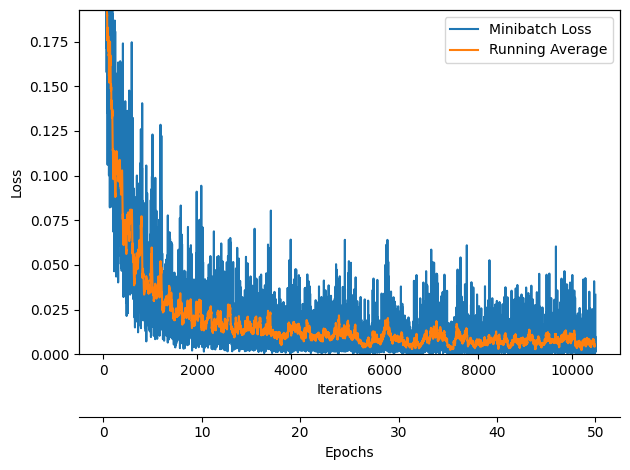

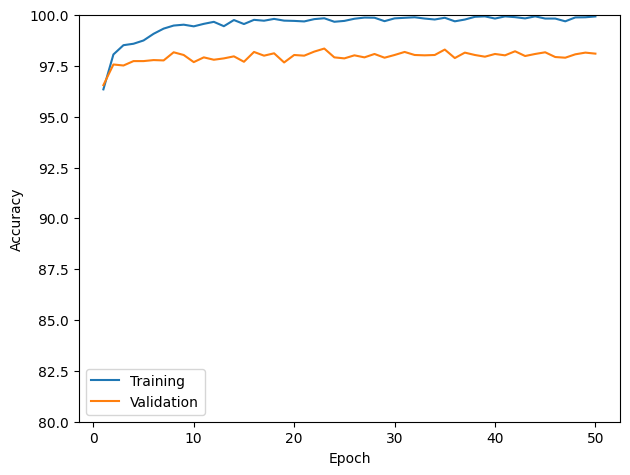

In [6]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(model=model, 
                                                                  num_epochs=NUM_EPOCHS, 
                                                                  train_loader=train_loader,
                                                                  valid_loader=valid_loader, 
                                                                  test_loader=test_loader, 
                                                                  optimizer=optimizer,
                                                                  device=DEVICE)


plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

# Model 2
Basic MLP with Drop out being used

In [7]:
class MLP2(torch.nn.Module):
    def __init__(self, num_features, num_classes, drop_proba, num_hidden_1, num_hidden_2):
        super().__init__()
        self.network = torch.nn.Sequential(
            # Layer 1
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba),
            # Layer 2
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.BatchNorm1d(num_hidden_2),
            torch.nn.ReLU(),
            torch.nn.Dropout(drop_proba),
            # Output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [8]:
torch.manual_seed(RANDOM_SEED)

model_2 = MLP2(num_features=28*28,
            num_classes=10,
            num_hidden_1=NUM_HIDDEN_1,
            num_hidden_2=NUM_HIDDEN_2,
            drop_proba=0.5)


optimizer = torch.optim.AdamW(model_2.parameters(), lr=0.005)

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.4154
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.8619
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.5915
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.5712
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.5072
Epoch: 001/050 | Train: 93.06% | Validation: 94.48%
Time elapsed: 0.07 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.6526
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.4447
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.5471
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.4021
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.4297
Epoch: 002/050 | Train: 94.54% | Validation: 95.55%
Time elapsed: 0.13 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.4580
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.3885
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.4133
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.3646
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.3627
Epoch: 003/050 | Train: 95.04% | Validation: 96.13%
Time elapsed: 0.20 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.3928
Epoch: 

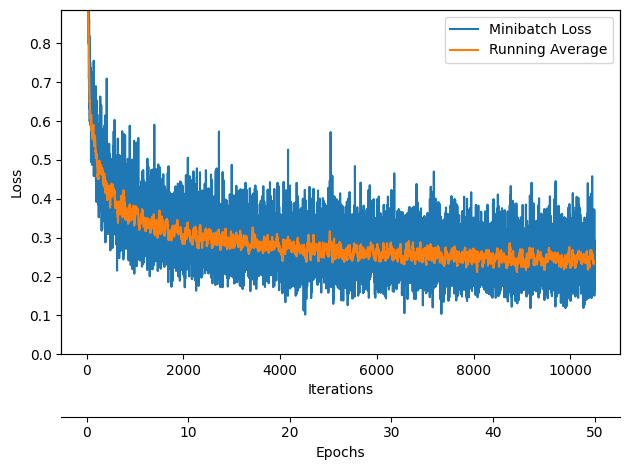

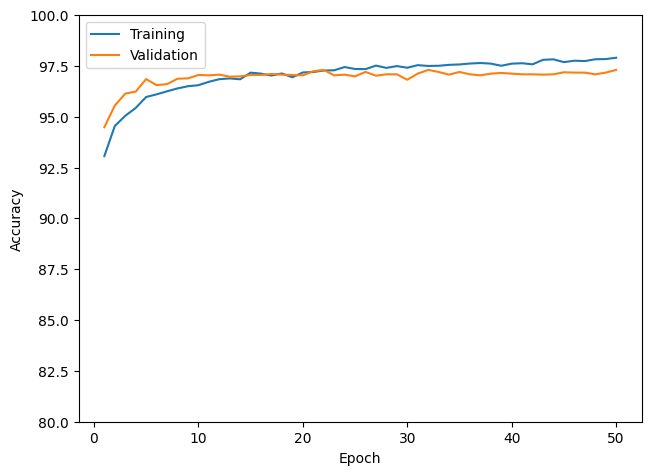

In [9]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(model=model_2, 
                                                                  num_epochs=NUM_EPOCHS, 
                                                                  train_loader=train_loader,
                                                                  valid_loader=valid_loader, 
                                                                  test_loader=test_loader, 
                                                                  optimizer=optimizer,
                                                                  device=DEVICE)


plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

# Model 3
MLP with Leaky_ReLU, BatchNorm and AdamW as optimizer and Drop out being used

In [10]:
class MLP3(torch.nn.Module):
    def __init__(self, num_features, num_classes, drop_proba, num_hidden_1, num_hidden_2):
        super().__init__()
        self.network = torch.nn.Sequential(
            # Layer 1
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.BatchNorm1d(num_hidden_1),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(drop_proba),
            # Layer 2
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.BatchNorm1d(num_hidden_2),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(drop_proba),
            # Output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [11]:
torch.manual_seed(RANDOM_SEED)

model_3 = MLP3(num_features=28*28,
            num_classes=10,
            num_hidden_1=NUM_HIDDEN_1,
            num_hidden_2=NUM_HIDDEN_2,
            drop_proba=0.5)


optimizer = torch.optim.AdamW(model_3.parameters(), lr=0.005)

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3838
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.7316
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.5072
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.5295
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.4684
Epoch: 001/050 | Train: 93.29% | Validation: 94.62%
Time elapsed: 0.08 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.6267
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.4526
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.5197
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.4744
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.3918
Epoch: 002/050 | Train: 94.75% | Validation: 95.97%
Time elapsed: 0.15 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.3934
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.3500
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.4539
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.3346
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.3465
Epoch: 003/050 | Train: 95.49% | Validation: 96.13%
Time elapsed: 0.23 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.3287
Epoch: 

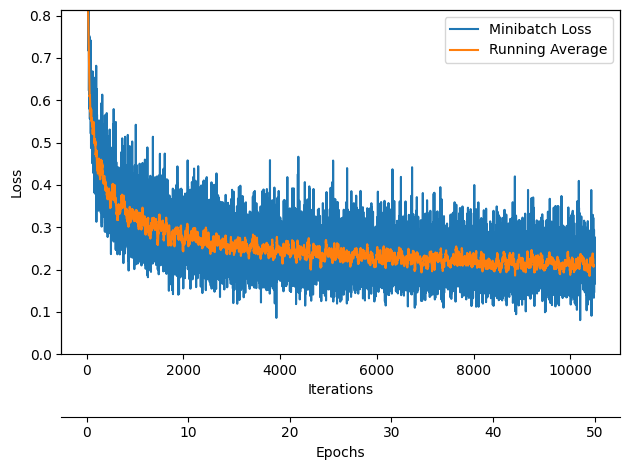

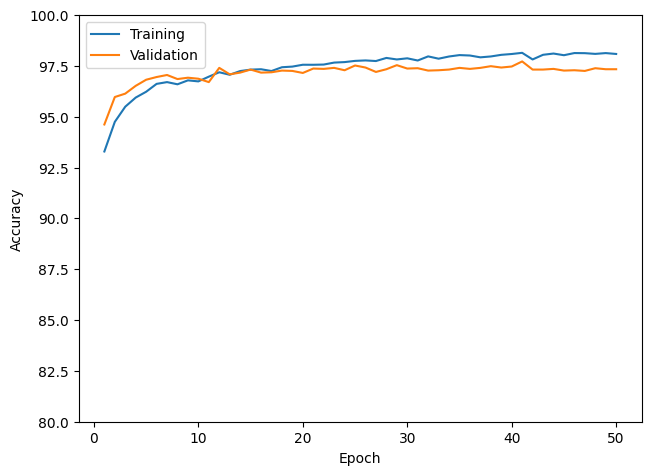

In [12]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(model=model_3, 
                                                                  num_epochs=NUM_EPOCHS, 
                                                                  train_loader=train_loader,
                                                                  valid_loader=valid_loader, 
                                                                  test_loader=test_loader, 
                                                                  optimizer=optimizer,
                                                                  device=DEVICE)


plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

# Model 4
MLP with Leaky_ReLU and AdamW as optimizer

In [16]:
class MLP4(torch.nn.Module):
    def __init__(self, num_features, num_classes, drop_proba, num_hidden_1, num_hidden_2):
        super().__init__()
        self.network = torch.nn.Sequential(
            # Layer 1
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.LeakyReLU(),
            # Layer 2
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.LeakyReLU(),
            # Output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [17]:
torch.manual_seed(RANDOM_SEED)

model_4 = MLP4(num_features=28*28,
            num_classes=10,
            num_hidden_1=NUM_HIDDEN_1,
            num_hidden_2=NUM_HIDDEN_2,
            drop_proba=0.5)


optimizer = torch.optim.AdamW(model_4.parameters(), lr=0.005)

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3093
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.3894
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.2403
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.2491
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.1692
Epoch: 001/050 | Train: 94.25% | Validation: 95.15%
Time elapsed: 0.07 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.1738
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.1439
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.1208
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.1707
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.1709
Epoch: 002/050 | Train: 96.71% | Validation: 96.50%
Time elapsed: 0.13 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.0675
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0812
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.0463
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.0557
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.1667
Epoch: 003/050 | Train: 97.32% | Validation: 96.70%
Time elapsed: 0.20 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.0548
Epoch: 

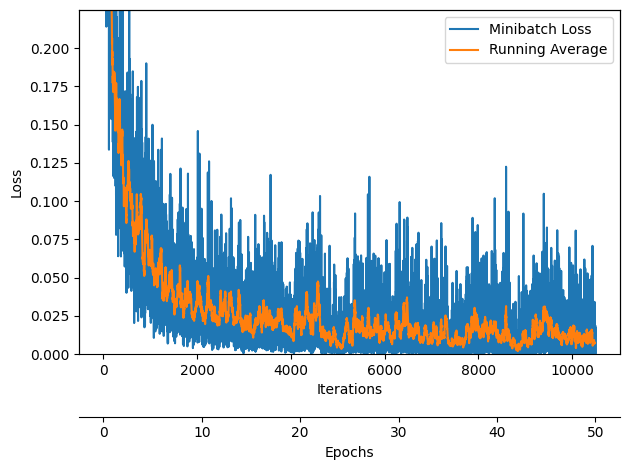

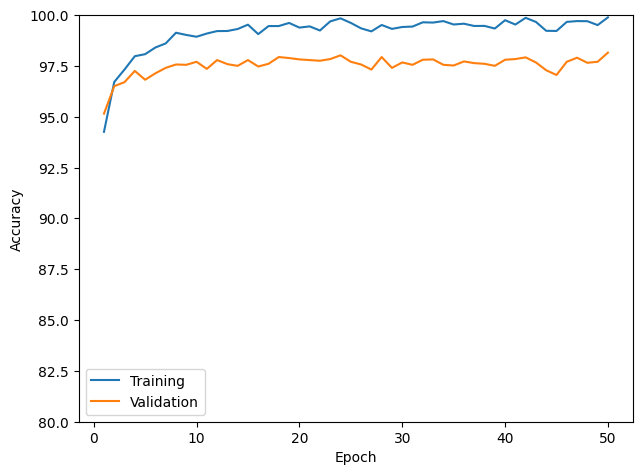

In [18]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(model=model_4, 
                                                                  num_epochs=NUM_EPOCHS, 
                                                                  train_loader=train_loader,
                                                                  valid_loader=valid_loader, 
                                                                  test_loader=test_loader, 
                                                                  optimizer=optimizer,
                                                                  device=DEVICE)


plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

# Model 5
MLP with Leaky_ReLU and AdamW as optimizer with drop out

In [19]:
class MLP5(torch.nn.Module):
    def __init__(self, num_features, num_classes, drop_proba, num_hidden_1, num_hidden_2):
        super().__init__()
        self.network = torch.nn.Sequential(
            # Layer 1
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(drop_proba),
            # Layer 2
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(drop_proba),
            # Output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [20]:
torch.manual_seed(RANDOM_SEED)

model_5 = MLP5(num_features=28*28,
            num_classes=10,
            num_hidden_1=NUM_HIDDEN_1,
            num_hidden_2=NUM_HIDDEN_2,
            drop_proba=0.5)


optimizer = torch.optim.AdamW(model_5.parameters(), lr=0.005)

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3108
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.7979
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.5429
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.5621
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.4218
Epoch: 001/050 | Train: 92.97% | Validation: 94.13%
Time elapsed: 0.07 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.6172
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.4404
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.5903
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.4554
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.3369
Epoch: 002/050 | Train: 94.06% | Validation: 95.30%
Time elapsed: 0.13 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.3390
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.3074
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.3905
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.3400
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.3801
Epoch: 003/050 | Train: 95.12% | Validation: 96.13%
Time elapsed: 0.20 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.3010
Epoch: 

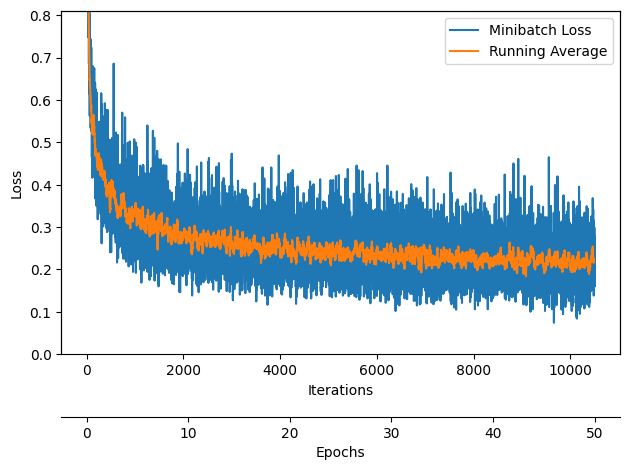

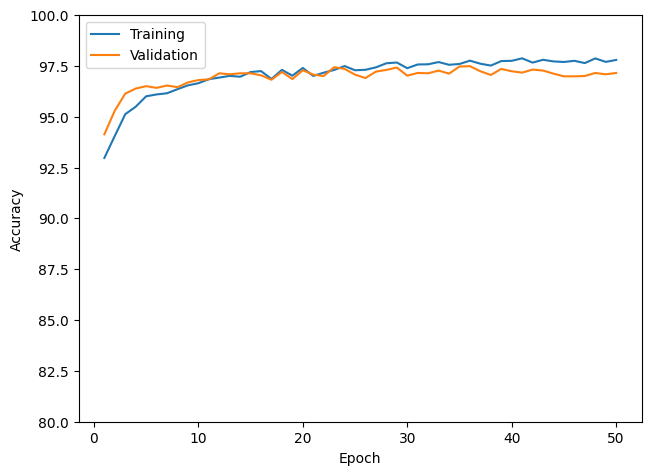

In [21]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(model=model_5, 
                                                                  num_epochs=NUM_EPOCHS, 
                                                                  train_loader=train_loader,
                                                                  valid_loader=valid_loader, 
                                                                  test_loader=test_loader, 
                                                                  optimizer=optimizer,
                                                                  device=DEVICE)


plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()